In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://www.metoffice.gov.uk/hadobs/hadcet/data/meantemp_daily_totals.txt"

df = pd.read_fwf(url). \
    assign(Date = lambda x: pd.to_datetime(x.Date))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92225 entries, 0 to 92224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    92225 non-null  datetime64[ns]
 1   Value   92225 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [7]:
df.sort_values("Value", ascending=False)

,Date,Value
91510,2022-07-19,28.1
90420,2019-07-25,25.3
90804,2020-08-12,25.2
64492,1948-07-29,25.1
81661,1995-08-01,24.8
...,...,...
18645,1823-01-19,-8.9
34701,1867-01-04,-9.0
25209,1841-01-08,-9.2
9125,1796-12-25,-10.8


<Axes: xlabel='month', ylabel='median_temp'>

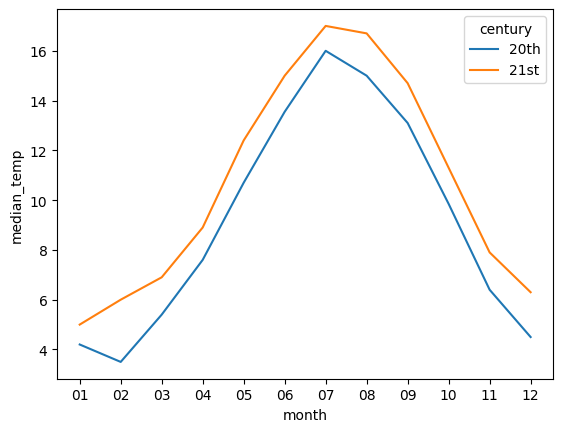

In [24]:
agg = df.query("(Date >= '1900-01-01' and Date < '1910-01-01') or (Date >= '2014-01-01')"). \
    assign(century = lambda x: np.where(x.Date < "2000-01-01", "20th", "21st")). \
        assign(month = lambda x: x.Date.dt.strftime("%m")). \
            groupby(["century", "month"], as_index=False). \
                agg(
                    mean_temp = ("Value", "mean"),
                    median_temp = ("Value", "median"),
                )
                
sns.lineplot(data=agg, x="month", y="median_temp", hue="century")

<Axes: xlabel='dd', ylabel='mean_30_day'>

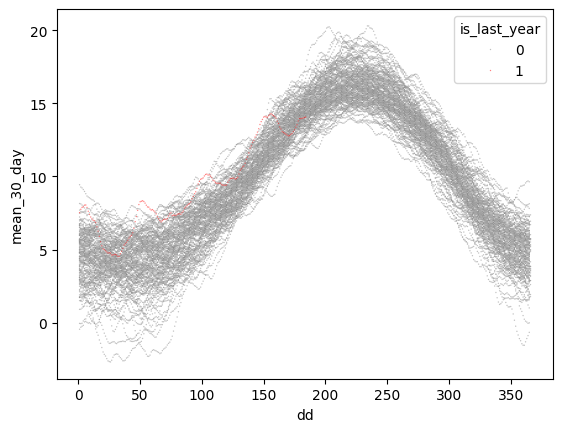

In [88]:
agg = df. \
    query("Date >= '1900-01-01'"). \
        sort_values("Date"). \
            assign(mean_30_day = lambda x: x.Value.rolling(window=30).mean()). \
                assign(year = lambda x: x.Date.dt.strftime("%Y")). \
                    assign(month = lambda x: x.Date.dt.month). \
                        assign(dd = lambda x: x.Date.dt.strftime("%j").astype(int)). \
                            assign(is_last_year = lambda x: np.where(x.Date >= "2024-01-01", 1, 0))
# agg = agg.query("Date < '1910-01-01'")
# agg
sns.scatterplot(data=agg, x="dd", y="mean_30_day", hue="is_last_year", palette=["gray", "red"], s=1, alpha=0.5)